**Assignment II  - A dashboard that explores a Spatial Dataset**

*The dashboard is an effective tool for investigating and visualising global bike-sharing networks. Its main goal is to give consumers an easy-to-use interface via which they can locate bike stations, comprehend how networks are distributed throughout various nations and towns, and get essential data about each network. Users may easily navigate through the extensive dataset of bike-sharing networks collected via the Citybik.es API by utilising dropdown menus and interactive maps.

*The dashboard's primary goal is to convey the accessibility and availability of bike-sharing choices around the globe. It presents a narrative on urban mobility and sustainability, highlighting the growing uptake of bike sharing as a practical and environmentally responsible mode of transportation. Users may get knowledge about bike station density, network coverage, and operating details by interacting with the dashboard's interactive elements. This information enables users to make well-informed decisions on bike rentals and commuting options.

*The dashboard's interface, which includes intuitive navigation and educational visualisations, is intended to be user-friendly. The focal point is an interactive map that makes it simple for users to explore the locations of bike stations. The user experience is improved overall by contextual information about each network provided via marker clusters and pop-up details.

*Overall, by showing how bike-sharing networks are integrated across many countries, the dashboard promotes a story of global connection and mobility. The dashboard provides a complete platform for users to interact with bike-sharing data and explore the potential of sustainable transportation globally, whether for journey planning, commuting, or urban exploration.


The below output shows the visuallization the data which from the API and then converted in to DataFrame for a clear view of the lat, long , company and city

In [18]:
import folium
import requests
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

urlInitial = 'http://api.citybik.es'
DataSetEndPoint ='/v2/networks'
data= []
initial_map_data = requests.get(urlInitial+DataSetEndPoint)
if initial_map_data.status_code == 200:
    print('Request successful!')
    data.append(initial_map_data.json()['networks'])  
else:
    print('Request failed with status code on Initial maps:', initial_map_data.status_code)
    print('Resposne:', initial_map_data.text)

# Access the first element of data since it's a list containing one list
networks_data = [{
    "company": ', '.join(network.get("company", ["Unknown"])),
    "city": network["location"]["city"],
    "country": network["location"]["country"],
    "latitude": network["location"]["latitude"],
    "longitude": network["location"]["longitude"],
    "name": network["name"]
} for network in data[0]]  

# Convert the data into a pandas DataFrame
df_networks = pd.DataFrame(networks_data)
print(df_networks)  

Request successful!
                                    company                        city  \
0                            ЗАО «СитиБайк»                      Moscow   
1                         Comunicare S.r.l.                       Siena   
2                        Cyclopolis Systems                    Maroussi   
3                        Cyclopolis Systems                     Nafplio   
4                         Comunicare S.r.l.  Parco dei Colli di Bergamo   
..                                      ...                         ...   
766            FAST RENT BIKE (PG) Sdn. Bhd                      Penang   
767  Sejong City Transportation Corporation                 세종 (Sejong)   
768                           Changwon City              창원시 (Changwon)   
769                             NS Groep NV                   Nederland   
770                                QBEI.inc                  京都 (Kyoto)   

    country   latitude   longitude            name  
0        RU  55.750000   3

The bellow Program exute the data from the DataFrame which we converted before and cut short the dataset only for Canada and represtent the data only from canada shows one static map and a canada interative map. 


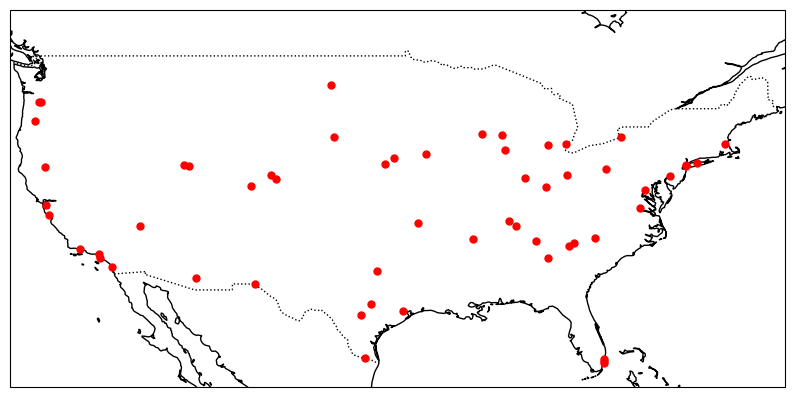

In [19]:
import folium
from folium.plugins import MarkerCluster
import cartopy.crs as ccrs
import cartopy.feature
# Creating the map centered around the average latitude and longitude


mean_lat = df_networks['latitude'].mean()
mean_lon = df_networks['longitude'].mean()
folium_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Adding a marker cluster to the map
marker_cluster = MarkerCluster().add_to(folium_map)

# Adding each network location to the marker cluster
for idx, row in df_networks.iterrows():

    if row['country'] == "US":
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['name']}\n{row['city']}, {row['country']}",
            tooltip=row['name']
        ).add_to(marker_cluster)

for idx, row in df_networks.iterrows():
    if row['country']=="US":
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=1,  # Size of the circle marker
            color='red',  # Color of the marker
            fill=True,
            fill_color='red',  # Fill color inside the marker
            popup=f"{row['name']}\n{row['city']}, {row['country']}",  # Popup text on click
            tooltip=row['name']  # Tooltip text on hover
        ).add_to(folium_map)



ig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE)

# Center on the US with a broad enough view that includes the UK
ax.set_extent([-125, -66.5, 24, 49])

# Plot each point
for idx, row in df_networks.iterrows():
    if row['country']=="US":
        ax.plot(row['longitude'], row['latitude'], marker='o', color='red', markersize=5)

# Show the plot
plt.show()
folium_map



The dashboard makes use of a dataset from the CityBik.es API, which is critical for providing detailed information about bike-sharing networks worldwide. This dataset contains detailed information about each bike-sharing network's geographic location, operational status, and affiliation, which serves as the foundation for the dashboard's functionality.

The primary dataset from CityBik.es contains key attributes such as geographical coordinates (latitude and longitude), the city and country where the bike station is located, and the bike-sharing company's identifying information (company ID). These details are critical for placing accurate markers on the map and populating the information popups associated with each one. This allows users to easily locate and identify bike stations on the map.

Using the CityBik.es dataset, the dashboard can provide real-time information about the availability and spread of bike-sharing services. This information is especially important for travelers seeking convenient, environmentally friendly, and cost-effective transportation options. The geographic spread of the data also enables the dashboard to serve a diverse user base, ranging from tourists to local commuters, by covering a wide range of locations globally.

The use of this dataset provides users with new information by combining spatial data with operational bike-sharing information, resulting in a unique visual and interactive experience. This integration aids in understanding urban mobility patterns and allows for the planning of travel routes based on the availability of bike-sharing resources. The dataset's comprehensive coverage ensures that users have access to the most recent and extensive information, allowing for better travel planning and decision-making.

The provided code outlines a dashboard designed to assist travelers in effortlessly locating and renting bicycles from stations around the globe. This interactive map-based tool utilizes a user-friendly interface, enabling users to select from various countries and cities to find specific bike stations. The main aim of the dashboard is to streamline the process of bike rental, making it hassle-free and accessible to tourists and locals alike.

At the core of the dashboard is an interactive map that visually represents the global distribution of bike rental stations, with detailed markers indicating each location's exact coordinates. Each marker is clickable and reveals essential information such as the station's associated company, city, and country, enhancing user understanding and facilitating decision-making. The map is complemented by dropdown menus that allow users to filter stations by country and city, refining their search to a manageable scope based on their travel plans or preferences.

This innovative tool leverages real-time data fetched from the CityBik.es API, ensuring that the information presented is current and accurate. By providing a satellite-styled basemap and a dynamic marker system, the dashboard not only helps in identifying the nearest bike rental options but also adds an element of spatial awareness, allowing users to plan their routes or explore new areas more effectively.

Overall, the dashboard tells a story of connectivity and convenience, empowering travelers to explore destinations with ease. It underscores the importance of sustainable travel options and supports urban mobility by making bike rentals a straightforward and appealing choice for transportation.

In [22]:
import requests
import ipyleaflet
import ipywidgets as widgets
from IPython.display import display
from bokeh.resources import INLINE

def fetch_network_data():
    try:
        response = requests.get("http://api.citybik.es/v2/networks")
        response.raise_for_status()  
        return response.json()['networks']
    except requests.RequestException as e:
        print(f"Failed to fetch data: {e}")
        return []

# Fetch network data
networks_data = fetch_network_data()

# Initialize the map with a suitable basemap
map_widget = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldImagery,  # A more 'satellite' styled map
    center=(20, 0), 
    zoom=1, 
    layout=widgets.Layout(height='600px')
)

heading = widgets.HTML(value="<h1>Find Bike Station Around The Globe</h1>")

marker_cluster = ipyleaflet.MarkerCluster(disable_clustering_at_zoom=12)
map_widget.add_layer(marker_cluster)

# Dropdown to select the country
country_dropdown = widgets.Dropdown(
    options=['All'] + sorted(set(network['location']['country'] for network in networks_data)),
    value='All',
    description='Country:',
)


city_dropdown = widgets.Dropdown(
    options=['All'],
    value='All',
    description='City:',
    disabled=True
)

# Function to create a marker
def create_marker(network):
    location = (network['location']['latitude'], network['location']['longitude'])
    icon = ipyleaflet.Icon(
        icon_url='https://img.icons8.com/color/48/000000/motorcycle.png',
        icon_size=[25, 25], 
        icon_color='black'
    )
    marker = ipyleaflet.Marker(location=location, draggable=False, icon=icon)
    popup_html = widgets.HTML(
        value=f"Company Name: {network['id']}<br>City: {network['location']['city']}<br>Country: {network['location']['country']}"
    )
    marker.popup = ipyleaflet.Popup(
        location=location, 
        child=popup_html, 
        close_button=False, 
        auto_close=False, 
        close_on_escape_key=False
    )
    return marker

# Function to update markers on the map
def update_markers(country='All', city='All'):
    selected_networks = [n for n in networks_data if (n['location']['country'] == country or country == 'All') and (n['location']['city'] == city or city == 'All')]
    new_markers = [create_marker(network) for network in selected_networks]
    marker_cluster.markers = new_markers
    if country != 'All' or city != 'All' and selected_networks:
        map_widget.center = (selected_networks[0]['location']['latitude'], selected_networks[0]['location']['longitude'])
        map_widget.zoom = 5

# Event handlers for dropdowns
def on_country_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_markers(change['new'])
        cities = sorted(set(n['location']['city'] for n in networks_data if n['location']['country'] == change['new']))
        city_dropdown.options = ['All'] + cities
        city_dropdown.value = 'All'
        city_dropdown.disabled = False

def on_city_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_markers(country_dropdown.value, change['new'])

country_dropdown.observe(on_country_change, names='value')
city_dropdown.observe(on_city_change, names='value')


update_markers('All')


sidebar = widgets.VBox([country_dropdown, city_dropdown])
dashboard = widgets.VBox([heading, sidebar, map_widget])
display(dashboard)


**Design Considerations for Layer Configuration**

Several thoughtful design decisions were made when creating the dashboard for locating bike rental stations around the world to improve user experience and functionality. The interactive map is the primary visualization layer and the dashboard's main feature. This map is built on a satellite-styled basemap from Esri's World Imagery service. The use of a satellite imagery basemap was deliberate; it provides a realistic view of the geographical landscape, which can be extremely useful to users in visually identifying landmarks and the urban context surrounding each bike station.

The bike stations on the map are represented by markers, each of which has its own custom icon—a colorful motorcycle. This icon was chosen because it is visually clear and relevant, and it stands out against the satellite imagery. These markers are more than just static visual elements; they are interactive components that show pop-up information when clicked. This includes the bike station's company name, city, and country, providing quick contextual information without cluttering the map.


**Design Choices for Interactivity**
The interactive aspects of these maps were carefully crafted to engage users and facilitate exploration:
Zooming and Panning: Essential interactive functionalities like zooming and panning empower users to navigate the data at their preferred pace and focus on regions of interest. The maps are initially set to a comprehensive global view, encouraging immediate user interaction.

Dynamic Data Filtering with Dropdowns: The map incorporating IPython widgets offers dynamic filtering through dropdown menus for selecting countries and cities. This feature supports user interaction by enabling on-the-fly map updates based on chosen criteria. It allows users to narrow their focus from a national to a city-level perspective, reducing visual clutter and targeting exploration.

Pop-ups and Tooltips: Incorporating pop-ups and tooltips links contextual information directly to the visual elements. Pop-ups, activated upon marker interaction, relay detailed information like the bike network’s name, city, and country, thus enriching the user's data acquisition without detouring from the map. Tooltips provide immediate, hover-over insights that enhance the interactivity.

Custom Icons: Employing custom icons, such as the motorbike icon, introduces a thematic dimension to the map, instantly signaling the type of data depicted. This visual strategy aligns with the map’s objective and augments user experience by weaving familiar imagery into the exploration process.
In essence, these design strategies across various mapping platforms and interactive modalities are designed to boost user engagement, enhance data legibility, and ensure a fluid exploration experience. The synthesis of dynamic interactive elements with static geographic features ensures that the maps fulfill both educational and practical roles in depicting and interpreting spatial data distributions.
